<a href="https://colab.research.google.com/github/YatinG021/-image-Classification-model-using-CNN-/blob/main/Dogs_vs_Cats_(CNN)(Efficient).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install -q kaggle

In [30]:
# Make a .kaggle directory and move API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [31]:
!kaggle datasets download -d salader/dogs-vs-cats
!unzip -q dogs-vs-cats.zip

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)
replace dogs_vs_cats/test/cats/cat.10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [32]:
# importing required Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [33]:
# Generators
# Using TensorFlow's image_dataset_from_directory to create training and validation datasets:
#Adding more data to reduce overfittig

BATCH_SIZE = 32
IMG_SIZE = (256, 256)

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory="train",
    labels='inferred',
    label_mode= 'int',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory="train",
    labels='inferred',
    label_mode= 'int',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


Now , here the files are stored in the numpy arrays format
**(Range = 0-255)**,
We need to store files in the
**(Range = 0-1)**,
Hence, we Normalize the data








In [34]:
# Normalize
def preprocess(images, labels):
    return images / 255.0, labels

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

In [35]:
# Create CNN Model
# Making an architecture of 3 convolutional Layers :
# 1. 32 filters , 2. 64 filters , 3. 128 filters
#For reducting overfittig
# Dropout
# Batch Normalization
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=
 (2, 2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))




In [36]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [71]:
# compile and train the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds,epochs=10,validation_data=val_ds)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 108ms/step - accuracy: 0.5496 - loss: 2.7195 - val_accuracy: 0.6241 - val_loss: 0.6409
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 131ms/step - accuracy: 0.6425 - loss: 0.6545 - val_accuracy: 0.6981 - val_loss: 0.5803
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.6953 - loss: 0.5791 - val_accuracy: 0.7760 - val_loss: 0.4617
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 131ms/step - accuracy: 0.7631 - loss: 0.4890 - val_accuracy: 0.7769 - val_loss: 0.4740
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 131ms/step - accuracy: 0.7900 - loss: 0.4418 - val_accuracy: 0.8300 - val_loss: 0.3800
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - accuracy: 0.8316 - loss: 0.3733 - val_accuracy: 0.8794 - val_loss: 0.2812
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.8587 - loss: 0.3189 - val_accuracy: 0.8534 - val_loss: 0.3368
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - accuracy: 0.8921 - loss:

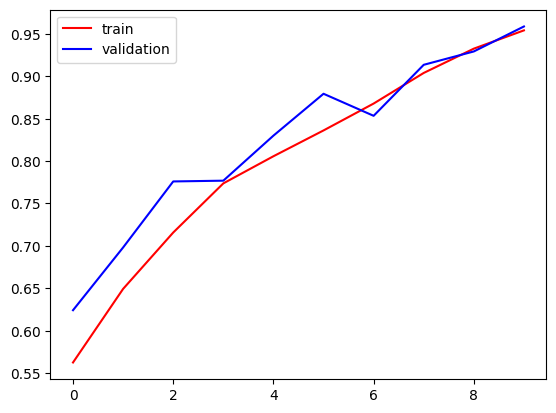

In [72]:
# visualising the train vs test accuracy graph
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

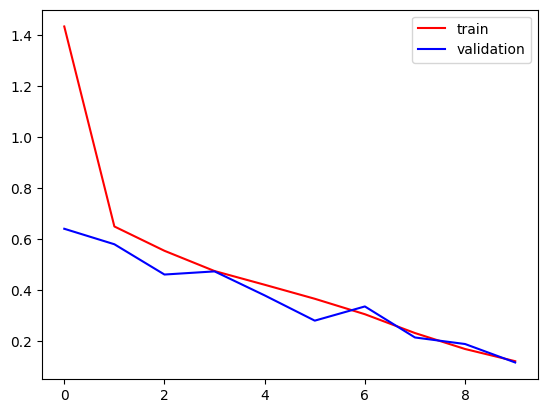

In [73]:
# plotting validation(test data) loss and training(train data) loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Hence, we can clearly see, we reduced overfittig in the data.
As the **Accuracy increased in test data with respect to train data**
So , to reduce overfittig , We used the following methods:
1. Add more data
2. Dropout
3. Batch Normalization



In [74]:
# Now , predicting on unseen new (image) data from internet
import cv2

In [75]:
img = cv2.imread("dog.jpg")

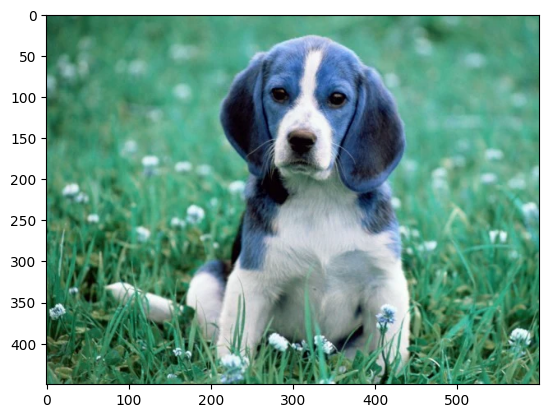

In [76]:
plt.imshow(img)

In [77]:
img.shape

(450, 600, 3)

In [78]:
img = cv2.resize(img, (256, 256))

In [79]:
test_input = np.expand_dims(img, axis=0)
test_input=img.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


array([[1.]], dtype=float32)

In [81]:
# Finding if the its a dog or cat
prediction = model.predict(test_input)

if prediction[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Dog


In [82]:
img1 = cv2.imread('cat.jpg')

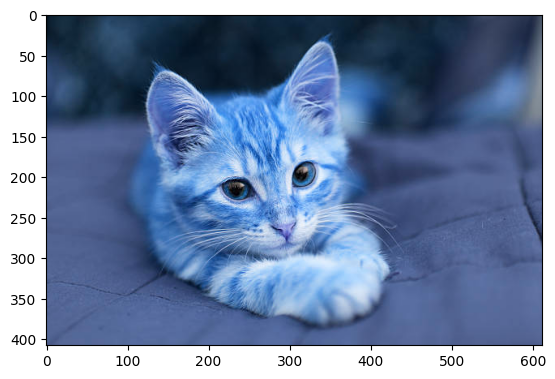

In [83]:
plt.imshow(img1)

In [84]:
img1.shape

(408, 612, 3)

In [85]:
img1 = cv2.resize(img1, (256, 256))

In [86]:
test_input1 = np.expand_dims(img1, axis=0)
test_input1 =img1.reshape((1,256,256,3))
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)

In [87]:
# Finding if the its a dog or cat
prediction = model.predict(test_input)

if prediction[0][0] > 0.5:
    print("Cat")
else:
    print("Dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Cat
